## INDENG 290
#### Assignment 3
Author: Gopal Kumar

In [79]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

**Problem statement.** The goal of this homework is to familiarize students with their choice of
either time series prediction methods or generative adversarial networks via performing mini research
projects. To get full credit, you need to submit solution to either Problem A (time series prediction
methods) or Problem B (generative adversarial networks) described below - not both! Both Problems
A and B assume some independent reading and literature research - lecture notes as well as papers
provided in the syllabus will be helpful; Problem B assumes independent study of Pytorch or Tensorflow packages for training neural networks (it is only required for extra credit in Problem A). Below
are the instructions how to <a href="https://pytorch.org/get-started/locally/">install Pytorch locally</a> and <a href="https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html">some Pytorch tutorials</a>; similarly, instructions
how to <a href="https://www.tensorflow.org/install">install Tensorflow locally</a> and <a href="https://www.tensorflow.org/tutorials">some Tensorflow tutorials</a>.

**Problem A. Financial time series prediction (100 points)**

<ul>
<li>
Get daily stock data for AMZN, GOOG, AAL, NCLH from Yahoo Finance for 2016, 2017, 2018,
2019, 2020. 
    
   You can find examples of using yfinance library here <a href="https://algotrading101.com/learn/yfinance-guide/">here</a>
</li>
</ul>

In [14]:
tickers_list = ['AMZN', 'GOOG', 'AAL', 'NCLH']
tickers_df = {}
for ticker in tickers_list:
    tickers_df[ticker] = yf.download(tickers=[ticker], start="2016-01-01",end="2020-12-31", interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
tickers_df['AMZN'].tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  160.250000  160.506500  159.208496  159.263504  159.263504   
2020-12-24  159.695007  160.100006  158.449997  158.634506  158.634506   
2020-12-28  159.699997  165.199997  158.634506  164.197998  164.197998   
2020-12-29  165.496994  167.532501  164.061005  166.100006  166.100006   
2020-12-30  167.050003  167.104996  164.123505  164.292496  164.292496   

               Volume  
Date                   
2020-12-23   41876000  
2020-12-24   29038000  
2020-12-28  113736000  
2020-12-29   97458000  
2020-12-30   64186000

**Predict daily stock volumes.**<br><br>
**1. (10 pts) Plot time series for stock volumes and close prices for the above time periods. List observations of the data patterns - what kind of properties should a model have in order to be able to predict stock volumes and close prices well? Comment on the distributional shift observations in 2020 - how would you enhance your models for 2020 to improve performance?**


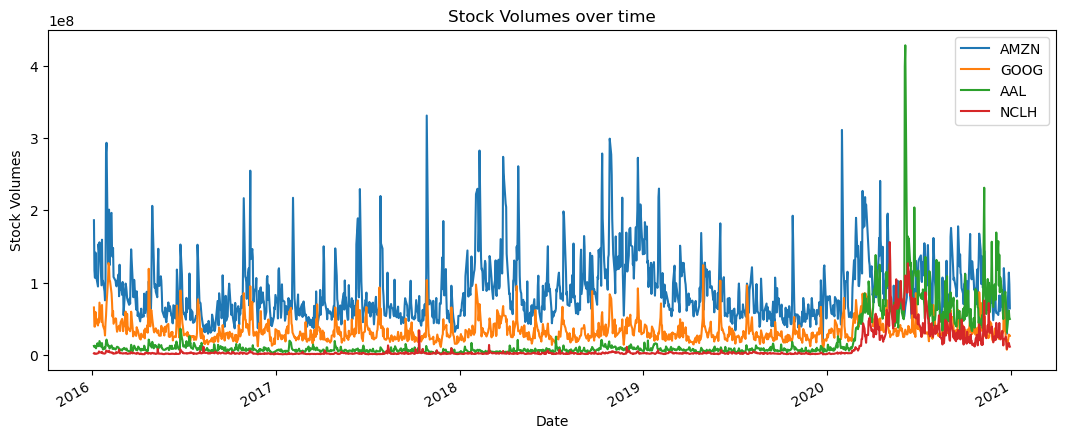

In [31]:
fig, ax = plt.subplots(figsize=(13, 5))
for ticker in tickers_list:
    tickers_df[ticker]['Volume'].plot(label=ticker)
plt.legend(loc='best')
plt.title("Stock Volumes over time")
plt.xlabel("Date")
plt.ylabel("Stock Volumes")
plt.show()

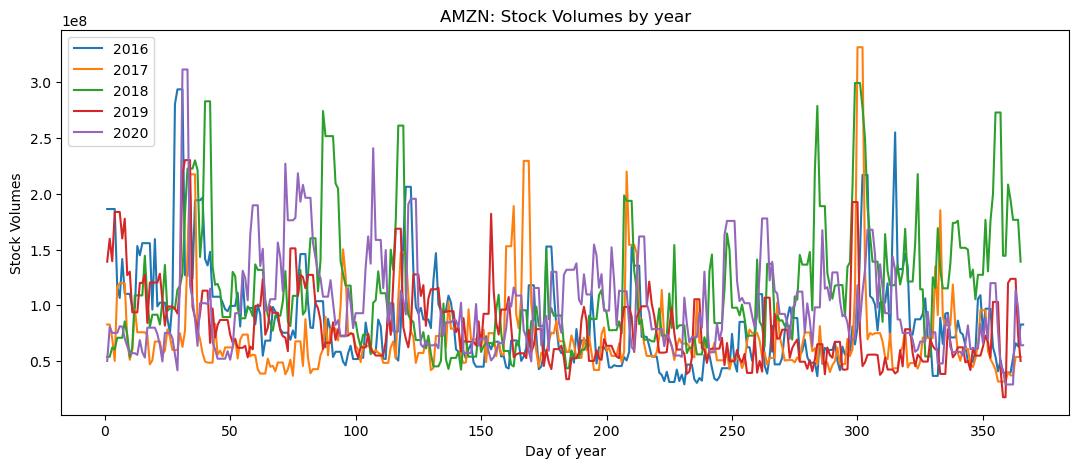

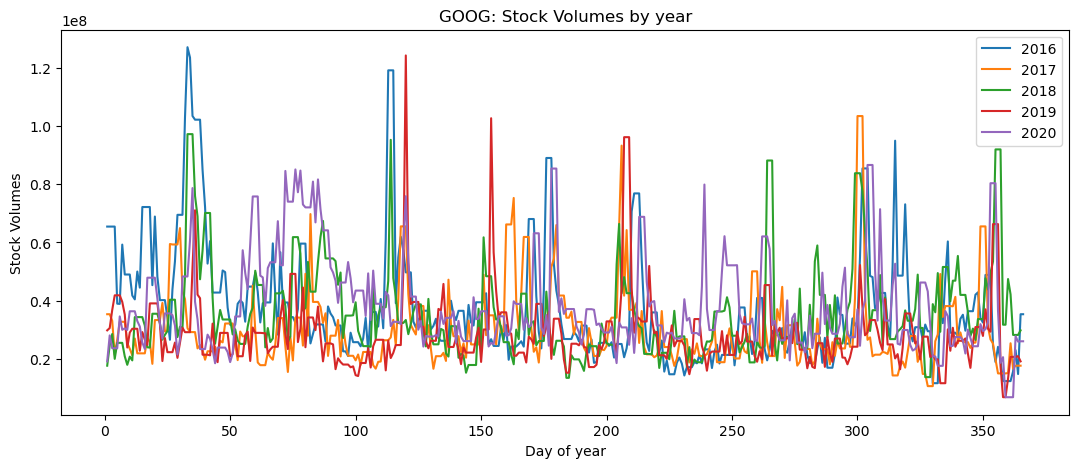

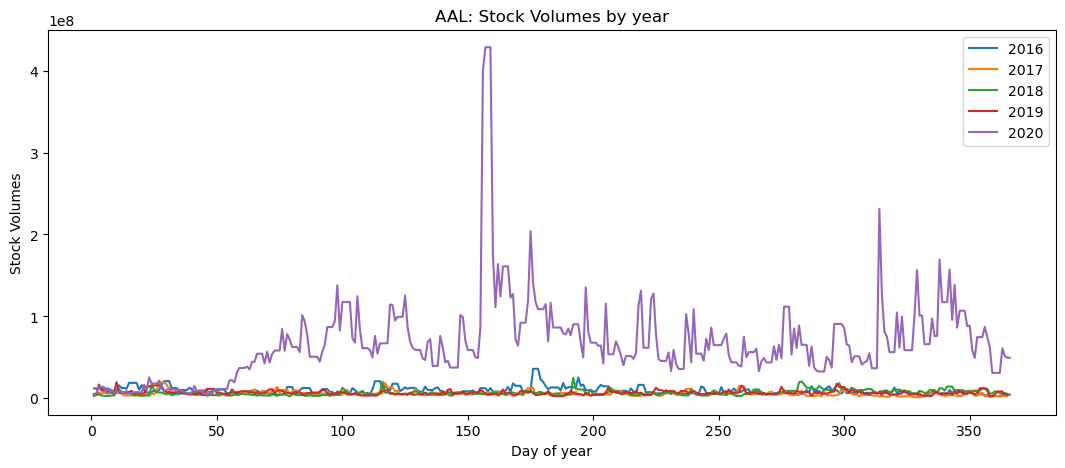

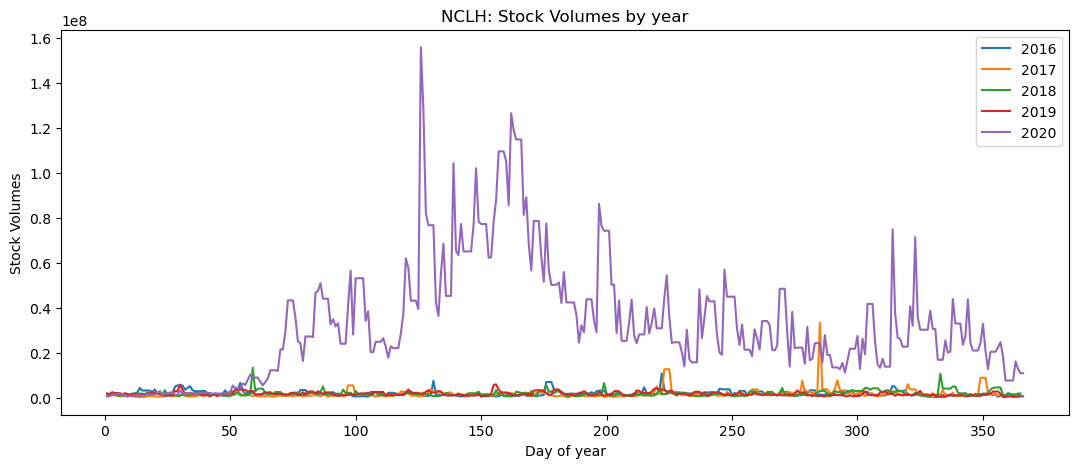

In [58]:
for ticker in tickers_list:
    tx = tickers_df[ticker][['Volume']]
    idx = pd.date_range('2016-01-01', '2020-12-31', freq='D')
    tx = tx.reindex(idx, method='ffill').fillna(method='bfill')
    tx['dayofyear'] = tx.index.dayofyear
    tx['year'] = tx.index.year
    tx = tx.reset_index()
    tx = tx.pivot_table(index='dayofyear',columns='year',values='Volume')
    tx.plot(figsize=(13, 5))
    plt.legend(loc='best')
    plt.title(ticker+": Stock Volumes by year")
    plt.xlabel("Day of year")
    plt.ylabel("Stock Volumes")


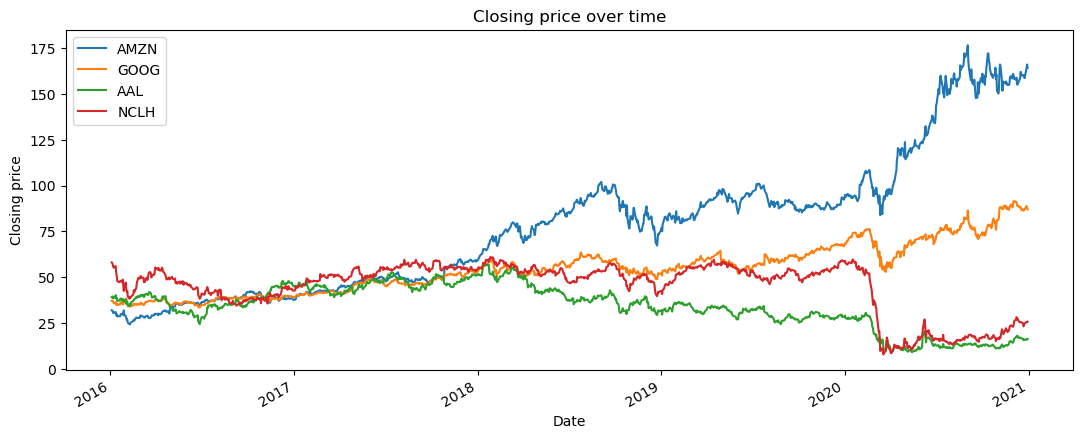

In [32]:
fig, ax = plt.subplots(figsize=(13, 5))
for ticker in tickers_list:
    tickers_df[ticker]['Adj Close'].plot(label=ticker)
plt.legend(loc='best')
plt.title("Closing price over time")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

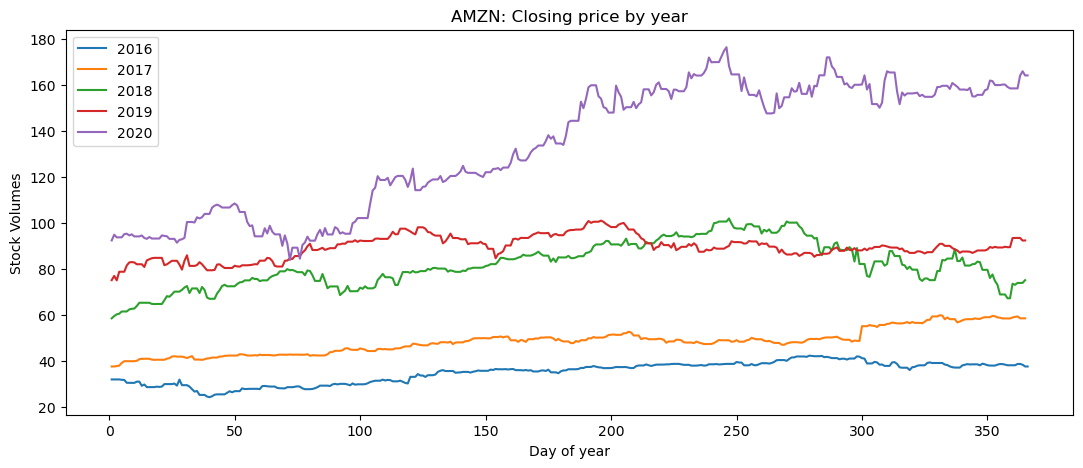

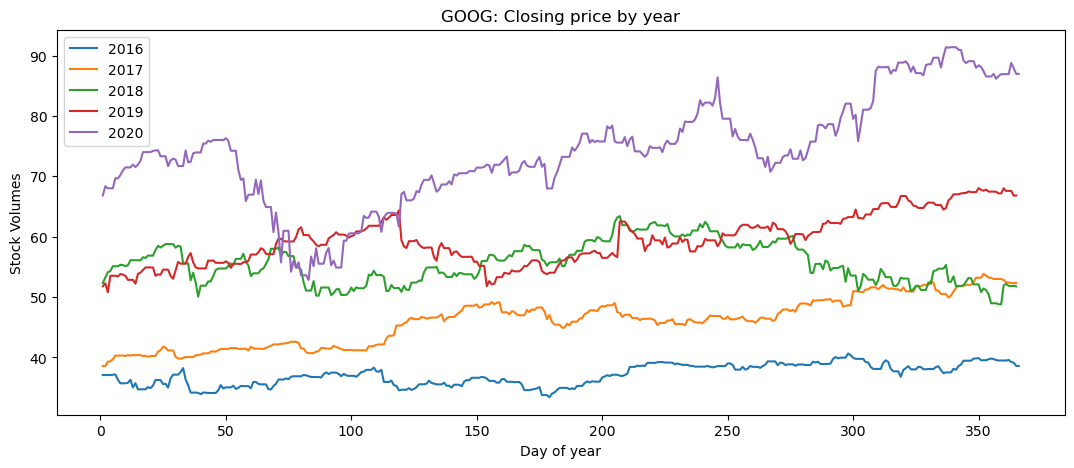

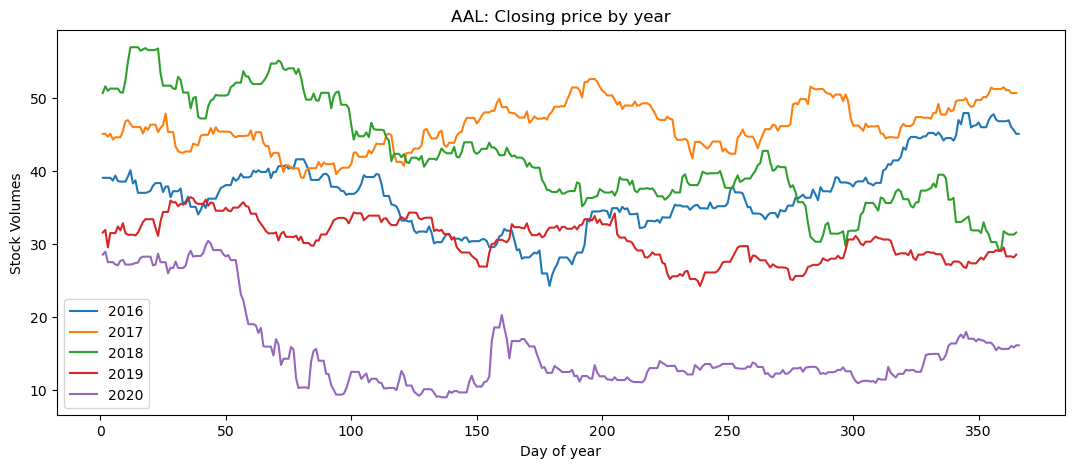

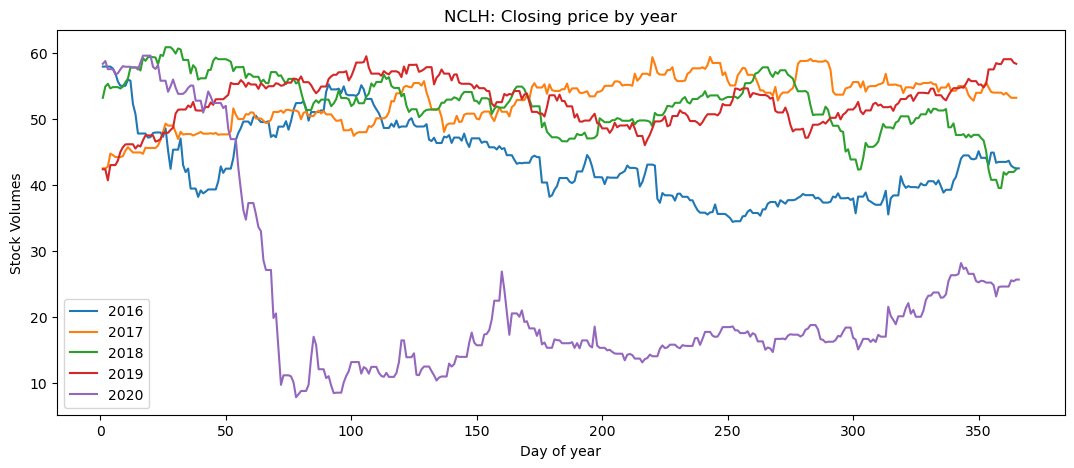

In [59]:
for ticker in tickers_list:
    tx = tickers_df[ticker][['Adj Close']]
    idx = pd.date_range('2016-01-01', '2020-12-31', freq='D')
    tx = tx.reindex(idx, method='ffill').fillna(method='bfill')
    tx['dayofyear'] = tx.index.dayofyear
    tx['year'] = tx.index.year
    tx = tx.reset_index()
    tx = tx.pivot_table(index='dayofyear',columns='year',values='Adj Close')
    tx.plot(figsize=(13, 5))
    plt.legend(loc='best')
    plt.title(ticker+": Closing price by year")
    plt.xlabel("Day of year")
    plt.ylabel("Stock Volumes")


**2. (30 pts) Using $N$-day sliding window, use $N$-day average and $N$-day median methods to
predict daily stock volumes for $N+1$ st day in 2019 and 2020 for $N=10,30,60$, namely:
<br><br>
$
\begin{array}{lr}
y_{N+1}= & \frac{y_1+y_2+\ldots+y_N}{N} \\
y_{N+1}= & \text { median }\left(y_1, y_2, \ldots, y_N\right)
\end{array}
$
<br><br>
Analyze prediction error compared to realized volumes on the same days: compute average mean square error by month. Also, calculate mean square error for banking holidays vs ordinary business days. Do you observe any patterns which $N$ works best? Can you comment why? Do you see any difference across different stocks? Elaborate on your findings. You'll likely notice that mean square error will be smaller for ordinary business days than for banking holidays. You'll also likely notice increase in mean square error during the distributional shift due to the Covid shock in 2020.**


C:\Users\dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


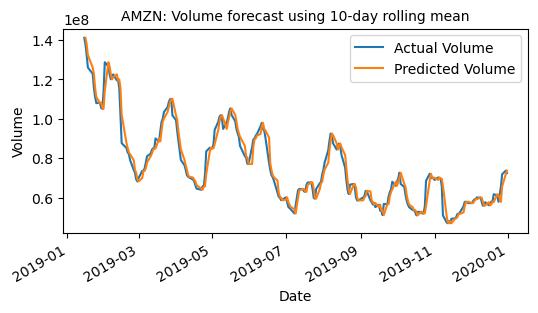

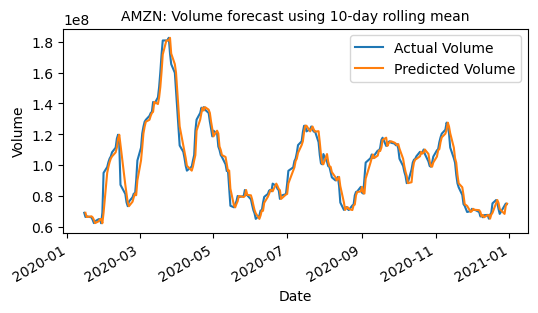

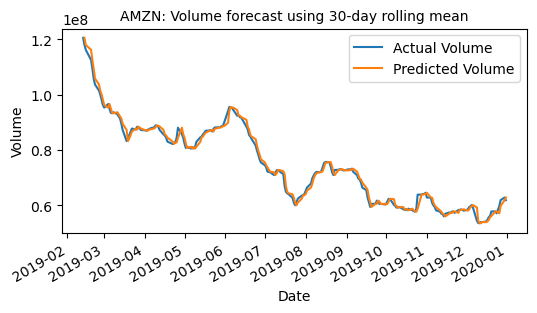

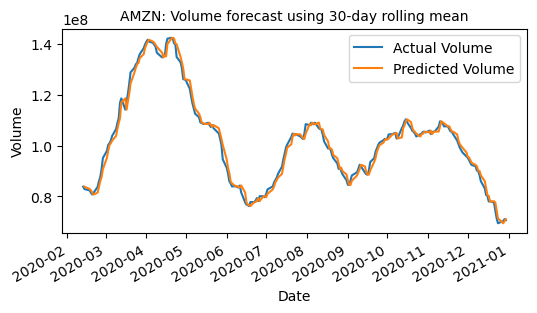

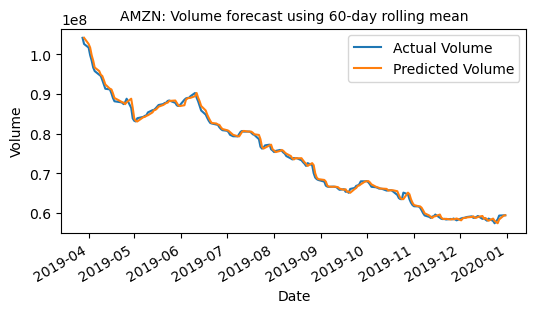

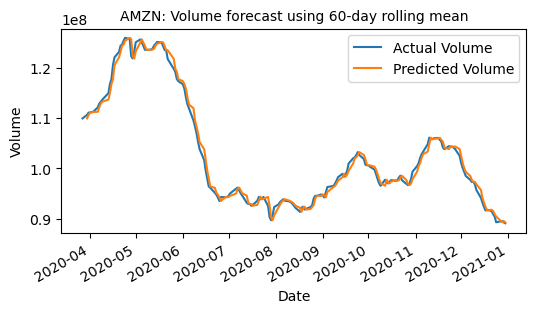

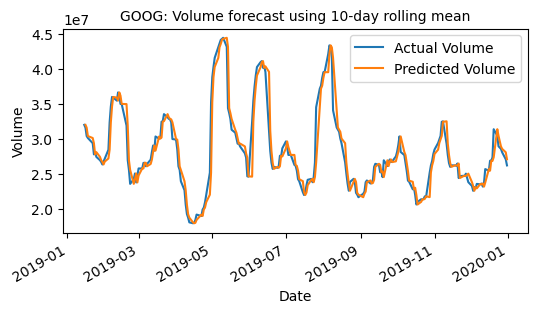

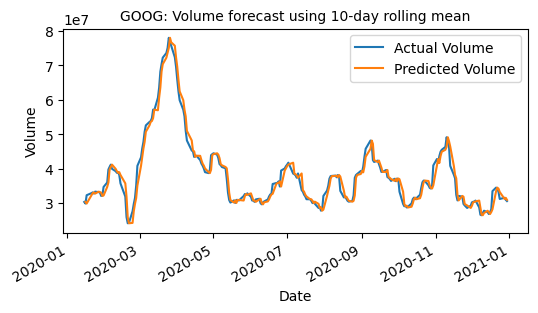

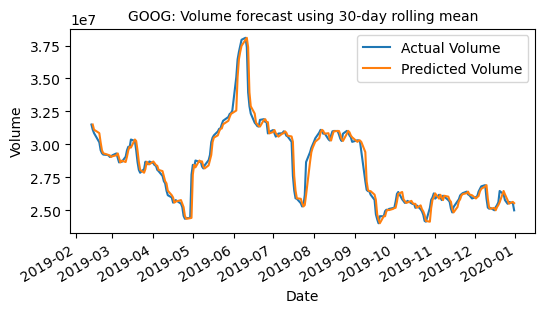

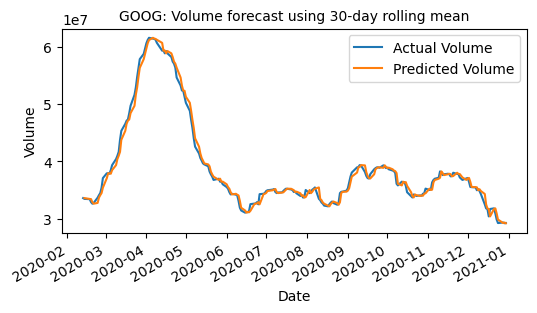

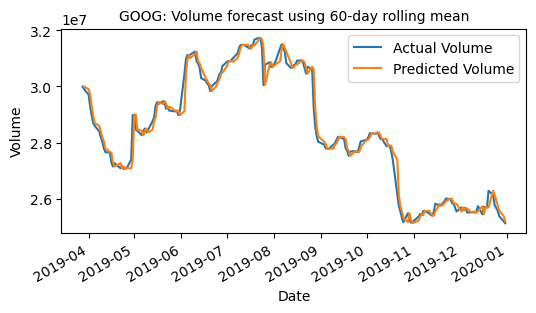

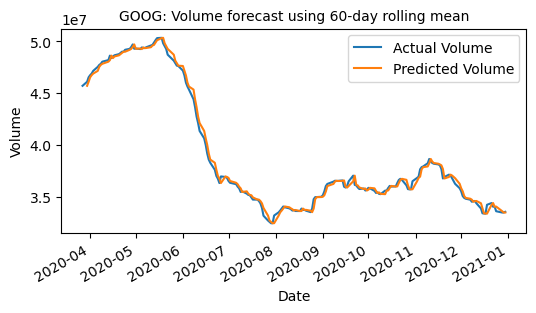

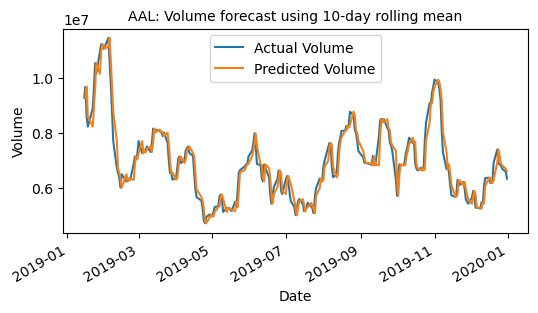

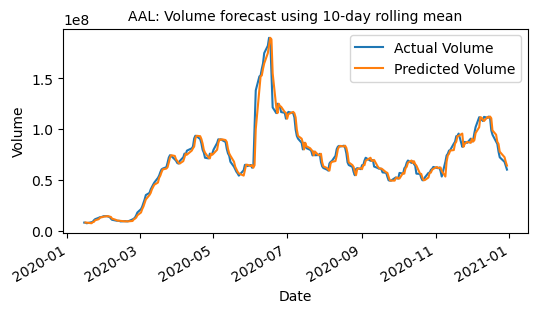

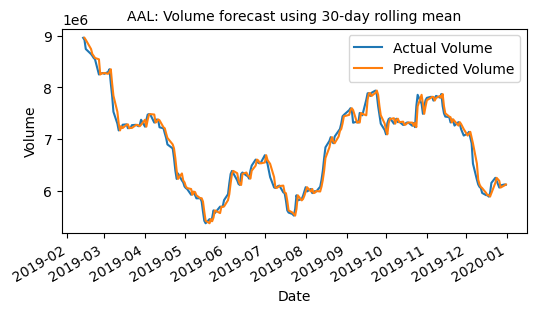

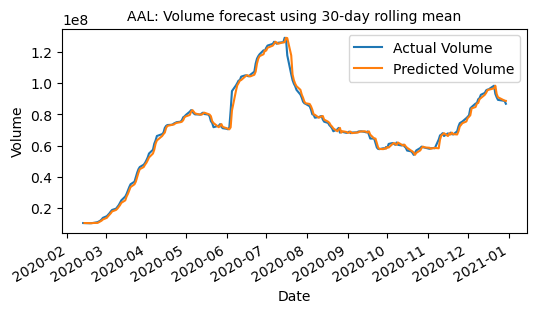

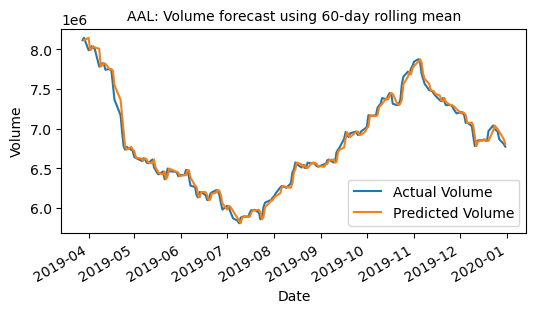

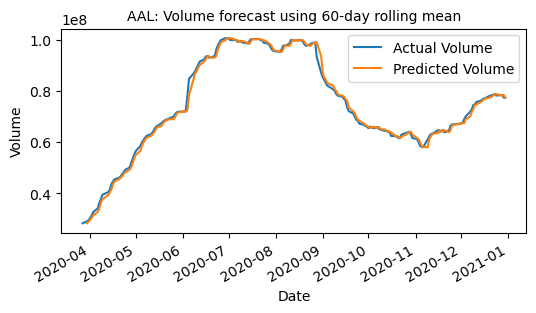

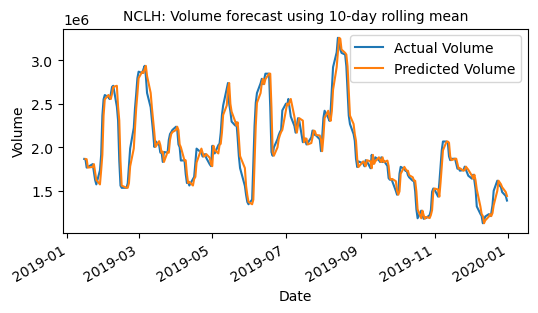

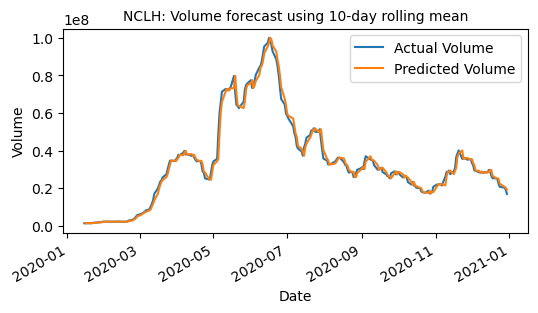

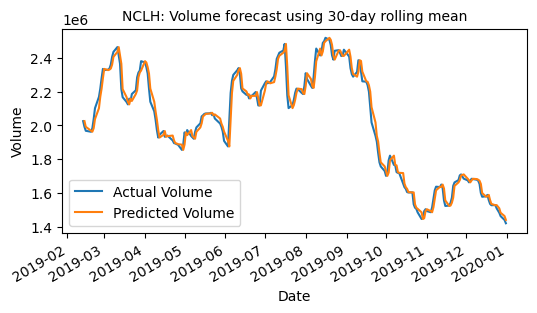

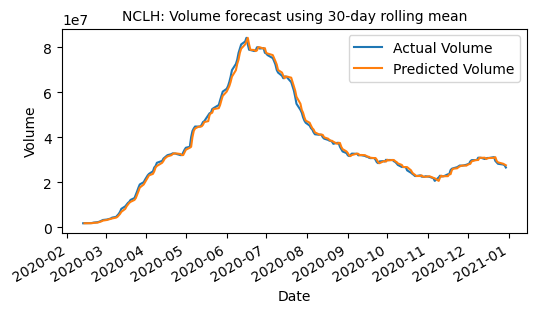

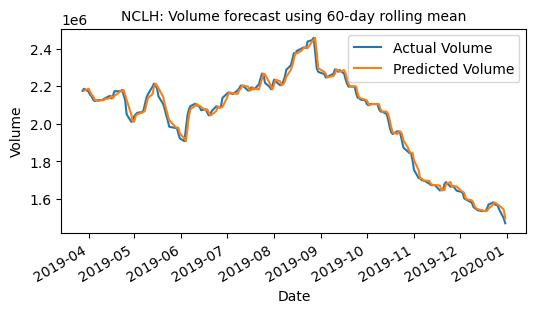

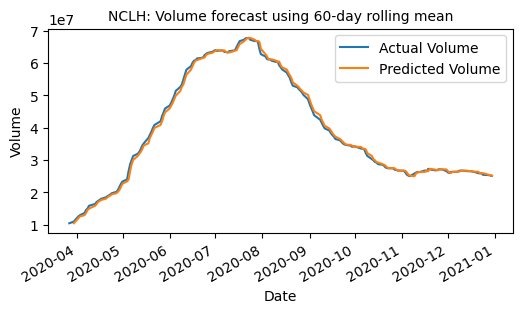

In [175]:
squared_error = {}
squared_error[2019] = []
squared_error[2020] = []
for ticker in tickers_list:
    for window_size in [10,30,60]:
        for year in [2019, 2020]:
            df_ = tickers_df[ticker][['Volume']]
            df_.columns = ['Actual Volume']
            df_.loc[:,'year'] = df_.index.year
            df_ = df_[df_.year == year]
            df_ = df_[['Actual Volume']]
            df_ = df_.rolling(window = window_size).mean()
            df_['Predicted Volume'] = df_['Actual Volume'].shift(1)
            df_.plot(figsize=(6, 3))
            plt.legend(loc='best')
            plt.title(ticker+": Volume forecast using "+str(window_size)+"-day rolling mean", fontsize=10)
            plt.xlabel("Date")
            plt.ylabel("Volume")
            df_['Error'] = df_['Predicted Volume'] - df_['Actual Volume']
            df_[ticker+"_"+str(window_size)+"_"+str(year)]= np.square(df_['Error'])
            squared_error[year].append(df_[ticker+"_"+str(window_size)+"_"+str(year)])


In [176]:
# holidays on which NASDAQ is open
banking_holidays = [
    '2019-10-14', # Columbus Day
    '2019-11-11', # Veterans Day
    '2019-11-29', # Friday after Thanksgiving
    '2019-12-31', # Dec 31
    '2020-10-12', # Columbus Day
    '2020-11-11', # Veterans Day
    '2020-11-27', # Friday after Thanksgiving
    '2020-12-31', # Dec 31
]

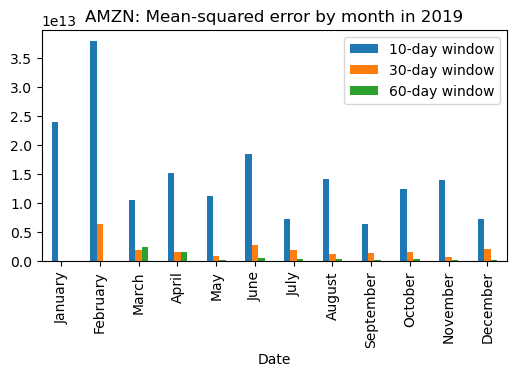

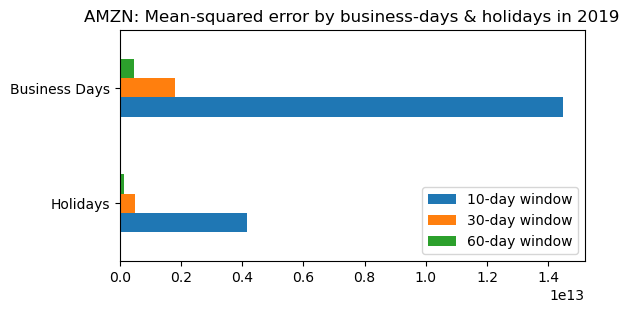

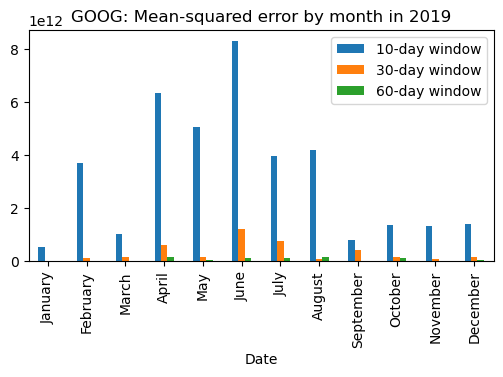

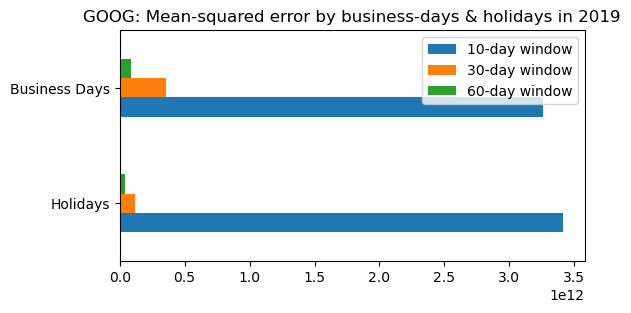

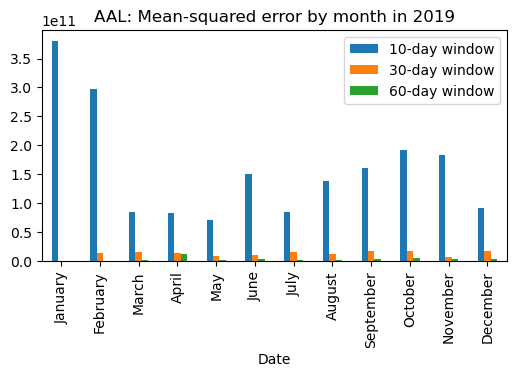

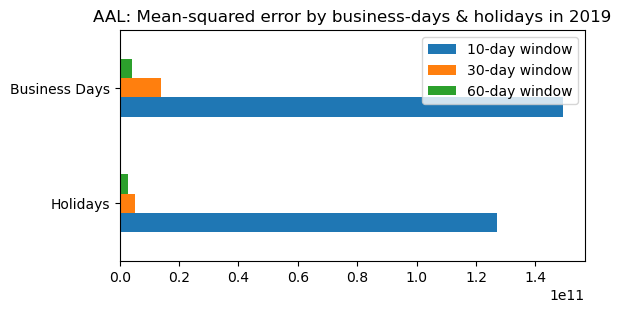

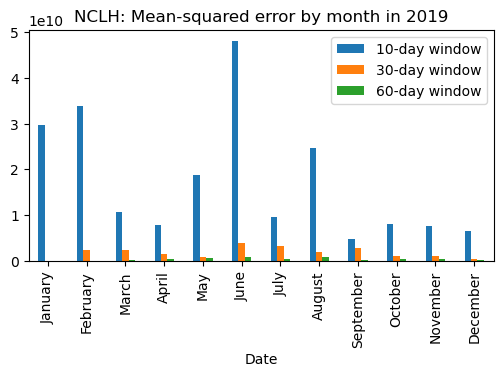

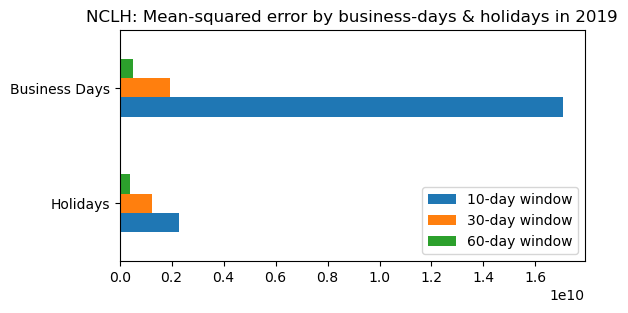

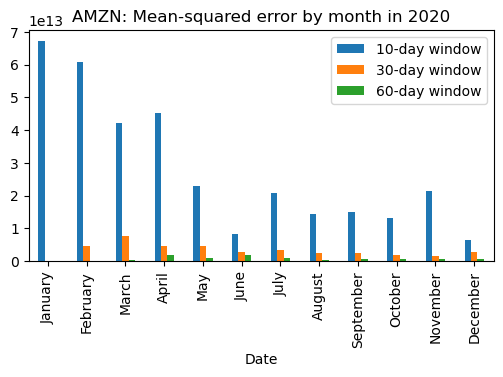

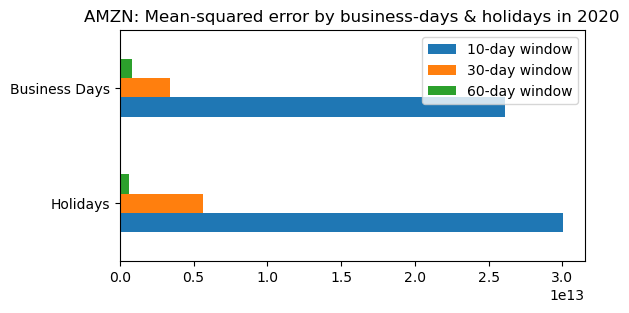

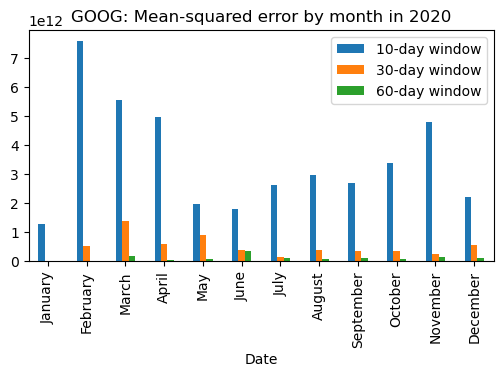

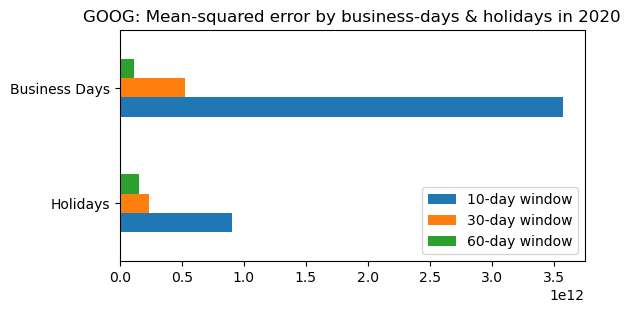

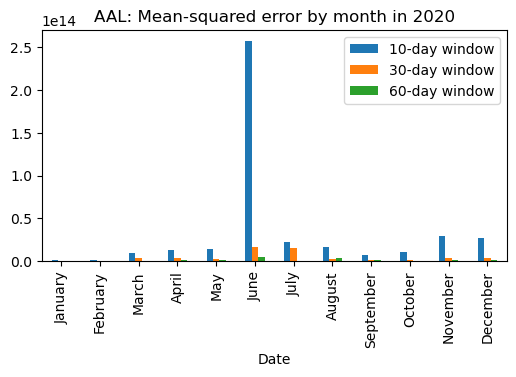

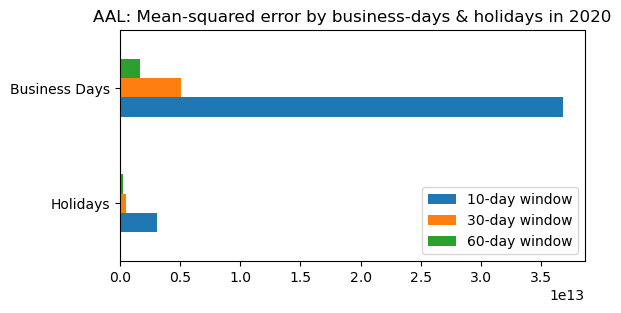

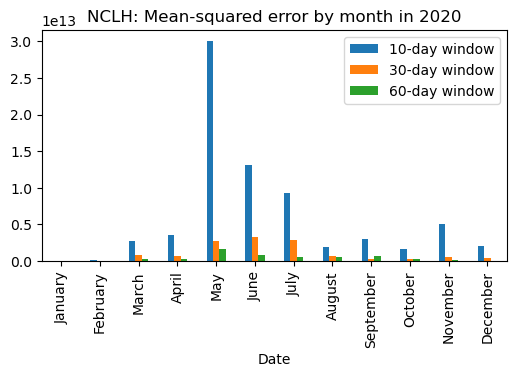

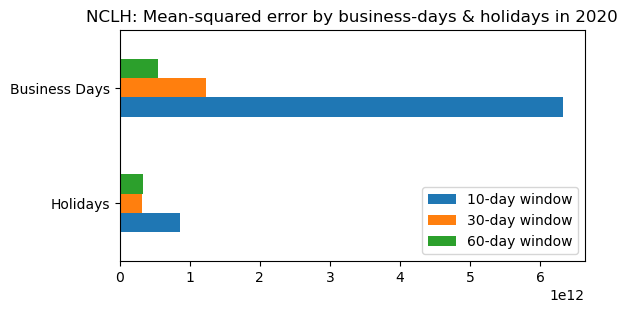

In [177]:
for year in [2019,2020]:
    tx = pd.concat(squared_error[year],axis=1)
    for ticker in tickers_list:
        colnames= [col for col in tx.columns if ticker in col]
        tx_ = tx[colnames].copy()
        tx_.columns = ['10-day window','30-day window','60-day window']
        ty = tx_.copy()
        tx_ = tx_.groupby(pd.Grouper(freq='M')).mean()
        tx_ = tx_.rename(index=lambda x: x.strftime('%B'))
        tx_.plot(kind='bar',title=ticker+": Mean-squared error by month in "+str(year), figsize=(6,3))
        
        holidays_list_ = pd.to_datetime(banking_holidays)
        ty_holidays = ty.loc[ty.index.isin(holidays_list_)]
        ty_working = ty[~ty.index.isin(holidays_list_)]
        holidays = ty_holidays.mean(axis=0).to_frame()
        holidays.columns = ['Holidays']
        working = ty_working.mean(axis=0).to_frame()
        working.columns = ['Business Days']
        pd.concat([holidays,working],axis=1).T.plot(kind='barh',title=ticker+": Mean-squared error by business-days & holidays in "+str(year), figsize=(6,3))

C:\Users\dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


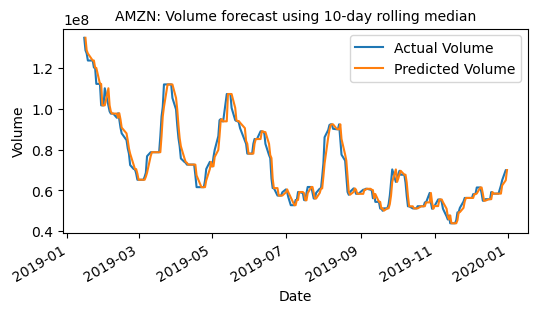

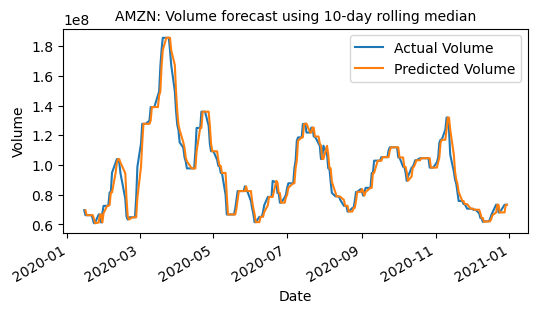

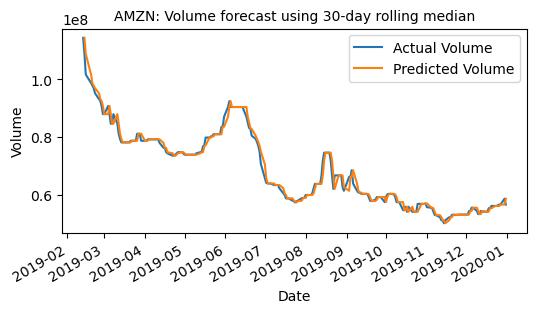

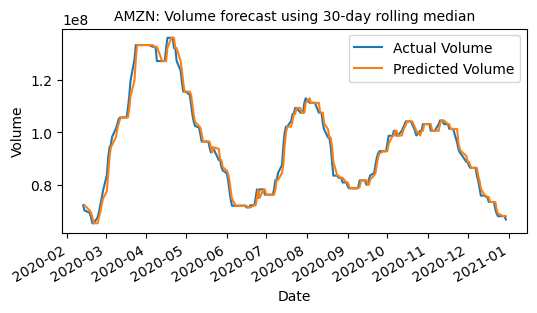

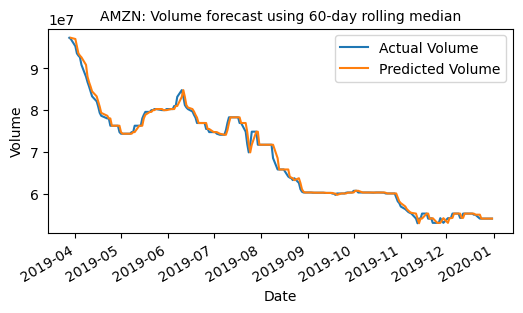

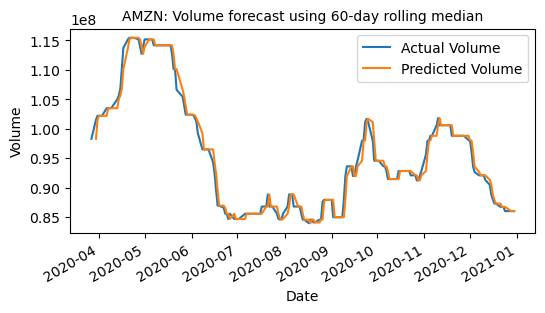

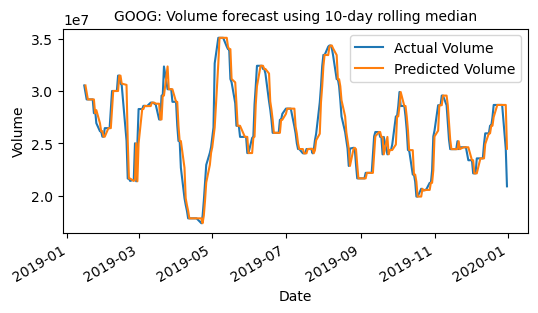

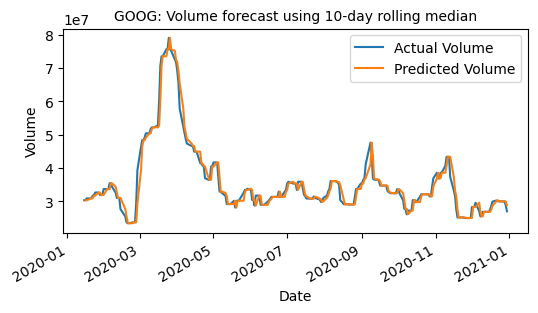

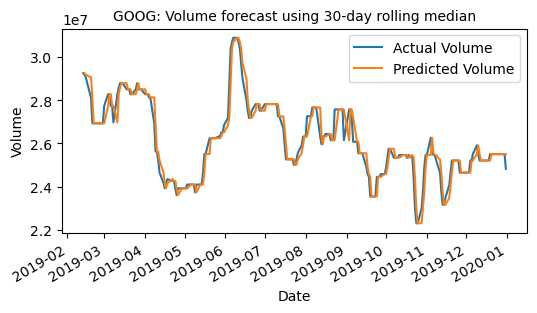

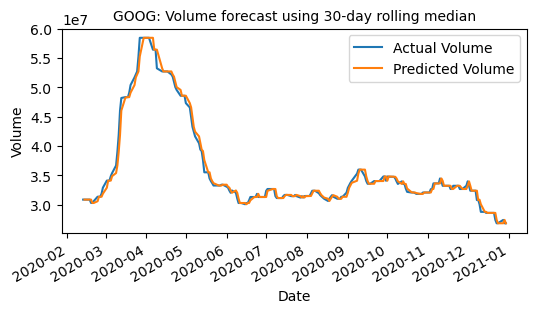

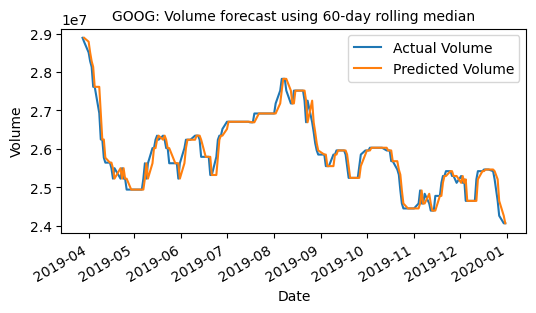

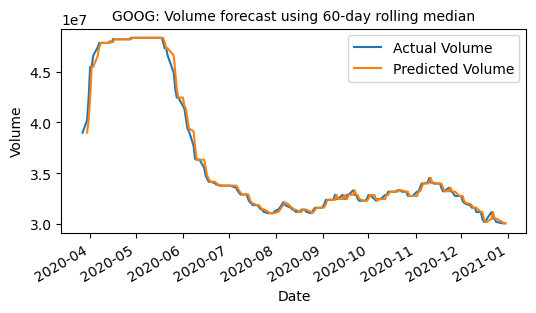

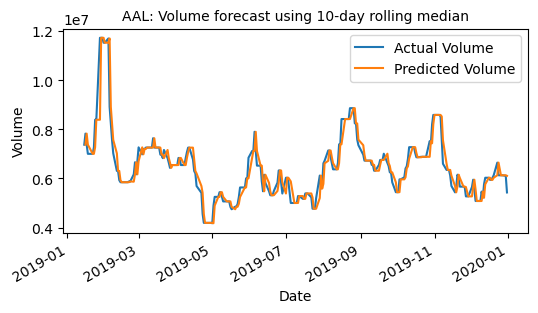

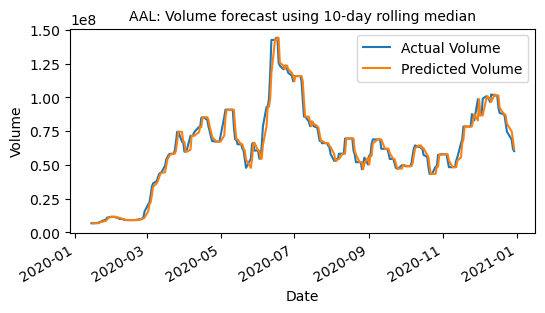

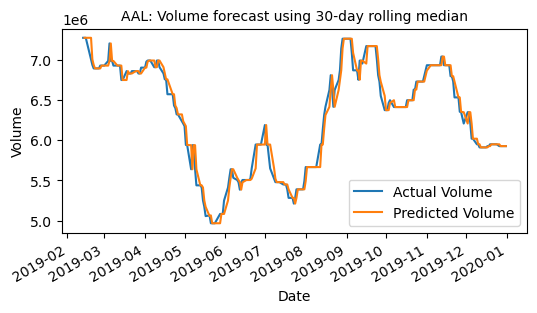

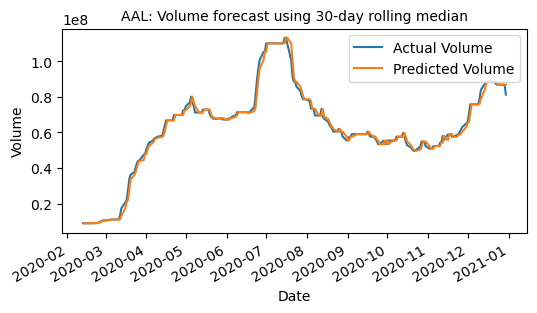

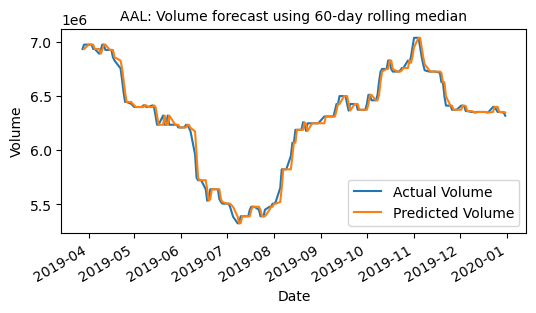

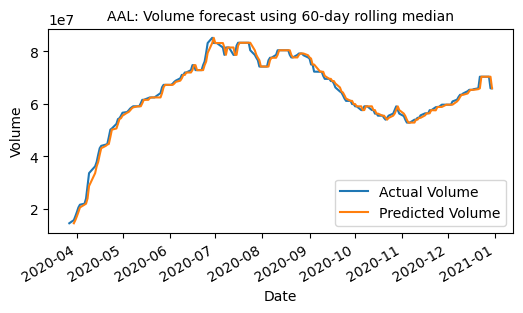

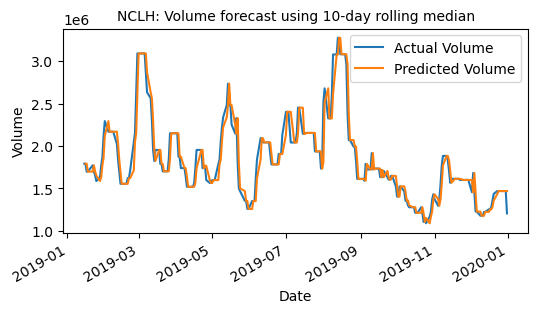

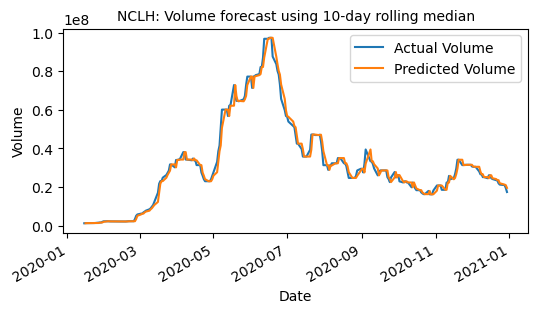

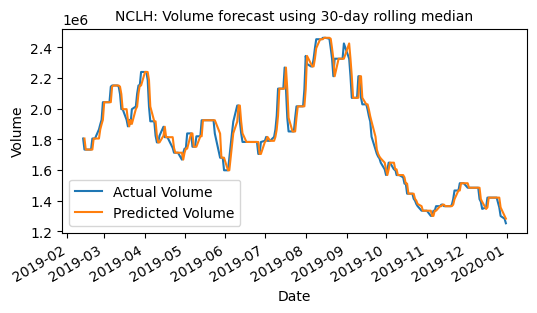

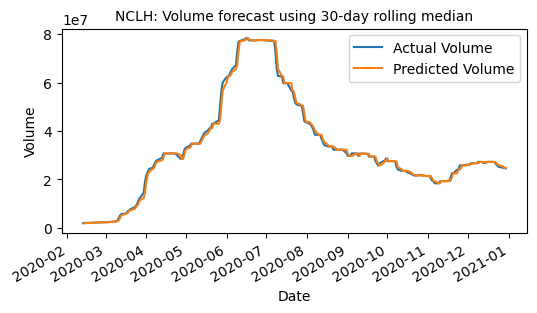

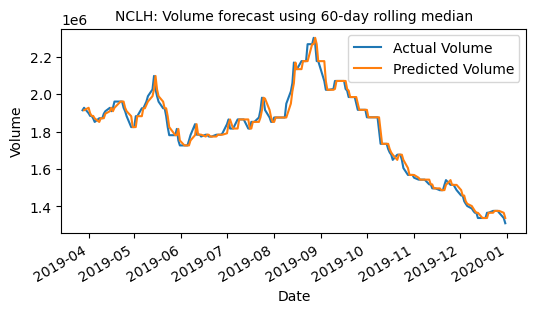

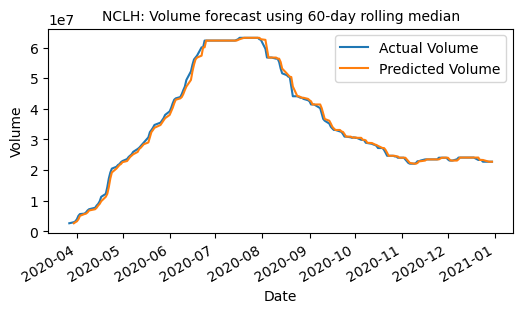

In [178]:
squared_error = {}
squared_error[2019] = []
squared_error[2020] = []
for ticker in tickers_list:
    for window_size in [10,30,60]:
        for year in [2019, 2020]:
            df_ = tickers_df[ticker][['Volume']]
            df_.columns = ['Actual Volume']
            df_.loc[:,'year'] = df_.index.year
            df_ = df_[df_.year == year]
            df_ = df_[['Actual Volume']]
            df_ = df_.rolling(window = window_size).median()
            df_['Predicted Volume'] = df_['Actual Volume'].shift(1)
            df_.plot(figsize=(6, 3))
            plt.legend(loc='best')
            plt.title(ticker+": Volume forecast using "+str(window_size)+"-day rolling median", fontsize=10)
            plt.xlabel("Date")
            plt.ylabel("Volume")
            df_['Error'] = df_['Predicted Volume'] - df_['Actual Volume']
            df_[ticker+"_"+str(window_size)+"_"+str(year)]= np.square(df_['Error'])
            squared_error[year].append(df_[ticker+"_"+str(window_size)+"_"+str(year)])
            

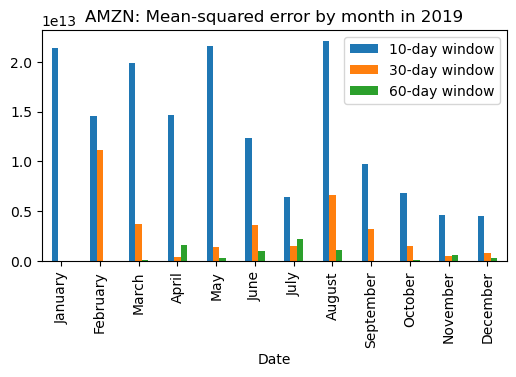

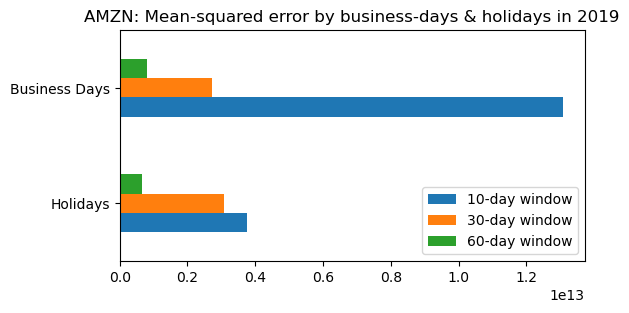

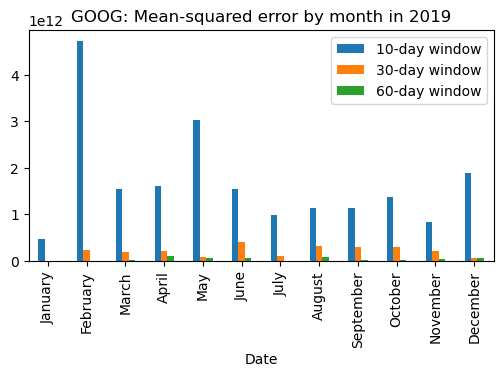

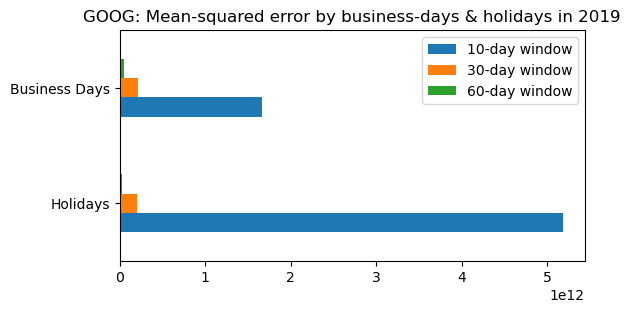

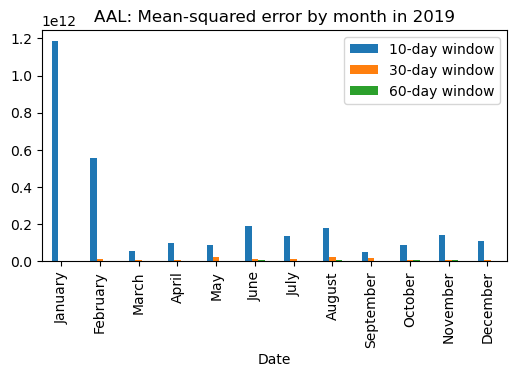

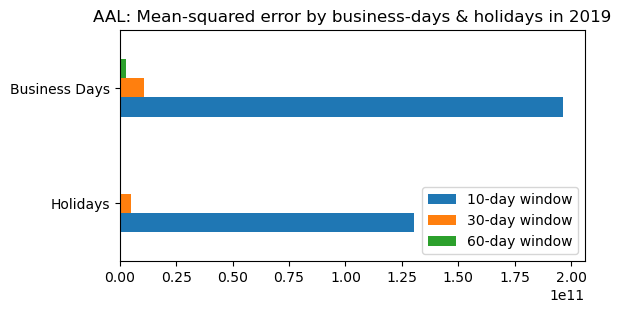

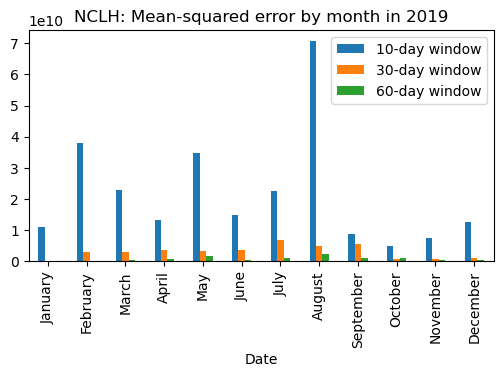

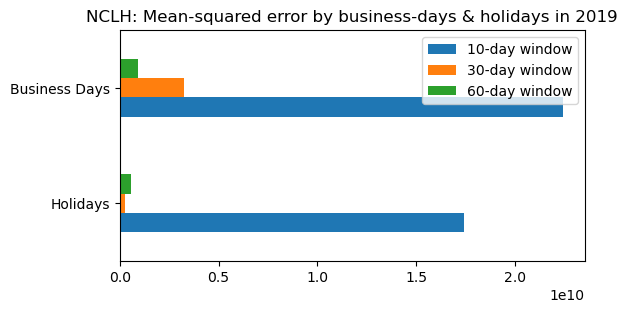

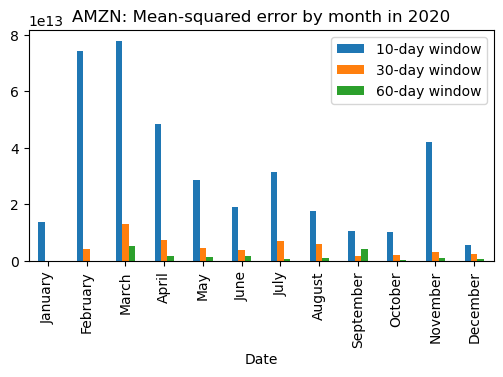

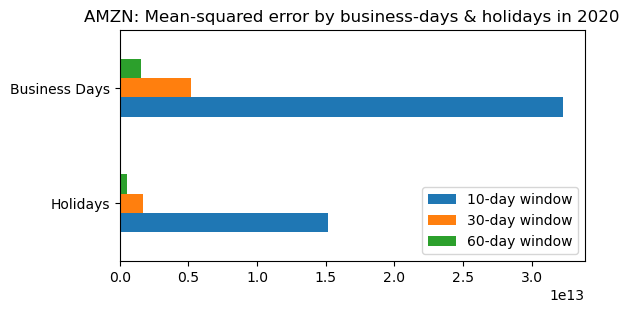

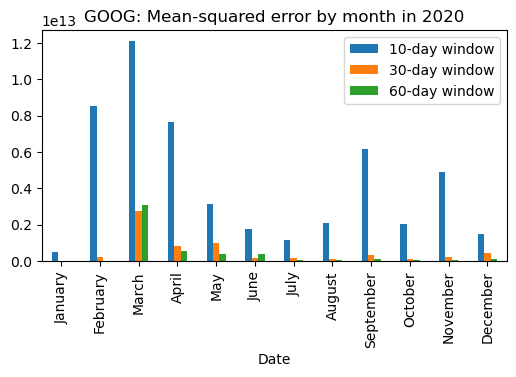

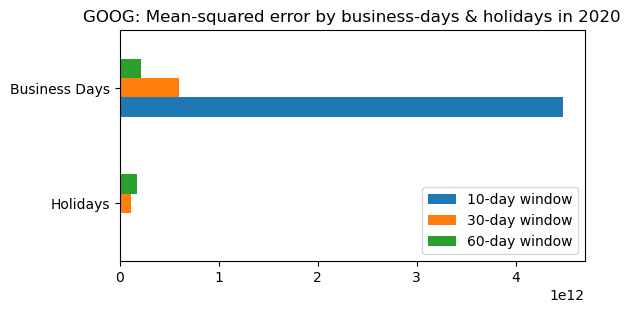

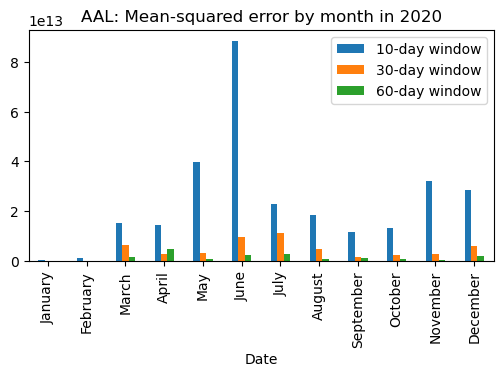

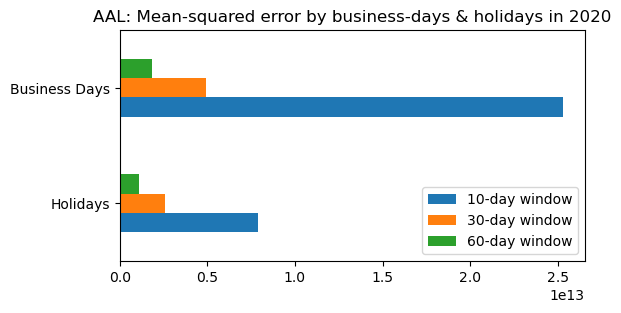

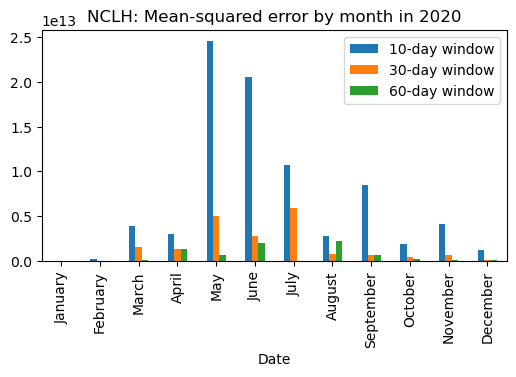

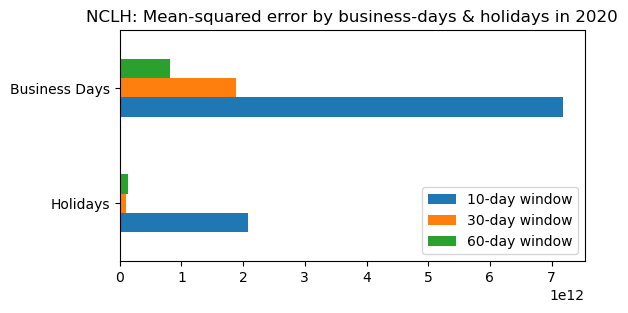

In [179]:
for year in [2019,2020]:
    tx = pd.concat(squared_error[year],axis=1)
    for ticker in tickers_list:
        colnames= [col for col in tx.columns if ticker in col]
        tx_ = tx[colnames].copy()
        tx_.columns = ['10-day window','30-day window','60-day window']
        ty = tx_.copy()
        tx_ = tx_.groupby(pd.Grouper(freq='M')).mean()
        tx_ = tx_.rename(index=lambda x: x.strftime('%B'))
        tx_.plot(kind='bar',title=ticker+": Mean-squared error by month in "+str(year), figsize=(6,3))
        
        holidays_list_ = pd.to_datetime(banking_holidays)
        ty_holidays = ty.loc[ty.index.isin(holidays_list_)]
        ty_working = ty[~ty.index.isin(holidays_list_)]
        holidays = ty_holidays.mean(axis=0).to_frame()
        holidays.columns = ['Holidays']
        working = ty_working.mean(axis=0).to_frame()
        working.columns = ['Business Days']
        pd.concat([holidays,working],axis=1).T.plot(kind='barh',title=ticker+": Mean-squared error by business-days & holidays in "+str(year), figsize=(6,3))

**3. ( $30 \mathrm{pts}$ ) Daily volumes are often forecast using linear autoregressive models. Using $N$-day sliding window, find coefficients $A, B, C$ in linear autoregressive models of lag 1 and lag 2 below to predict daily stock volumes for $N+1$ st day in 2019 and 2020 for $N=10,30,60$. Specifically:**<br><br>
$
\begin{array}{lr}
y_{N+1}= & A y_N+B+\epsilon_{N+1} \\
y_{N+1}= & A y_N+B y_{N-1}+C+\epsilon_{N+1}
\end{array}
$
<br><br>
**Do you think models of higher lag would be necessary? Why? Do you observe any patterns which $N$ works best? Do you see any difference across different stocks? Repeat mean square error analysis above and comment on your findings with regard to ordinary business days vs. holidays as well as the distributional shift in 2020.**


In [ ]:
squared_error = {}
squared_error[2019] = []
squared_error[2020] = []
for ticker in tickers_list:
    for window_size in [10,30,60]:
        for year in [2019, 2020]:
            df_ = tickers_df[ticker][['Volume']]
            df_.columns = ['Actual Volume']
            df_.loc[:,'year'] = df_.index.year
            df_ = df_[df_.year == year]
            df_ = df_[['Actual Volume']]
            df_ = df_.rolling(window = window_size).median()
            df_['Predicted Volume'] = df_['Actual Volume'].shift(1)
            df_.plot(figsize=(6, 3))
            plt.legend(loc='best')
            plt.title(ticker+": Volume forecast using "+str(window_size)+"-day rolling median", fontsize=10)
            plt.xlabel("Date")
            plt.ylabel("Volume")
            df_['Error'] = df_['Predicted Volume'] - df_['Actual Volume']
            df_[ticker+"_"+str(window_size)+"_"+str(year)]= np.square(df_['Error'])
            squared_error[year].append(df_[ticker+"_"+str(window_size)+"_"+str(year)])
            

In [188]:
df_

Actual Volume
Date                     
2019-01-02      159662000
2019-01-03      139512000
2019-01-04      183652000
2019-01-07      159864000
2019-01-08      177628000
...                   ...
2019-12-24       17626000
2019-12-26      120108000
2019-12-27      123732000
2019-12-30       73494000
2019-12-31       50130000

[252 rows x 1 columns]

In [198]:
ticker = 'AMZN'
year = 2019

In [217]:
df_ = tickers_df[ticker][['Volume']]
df_.columns = ['Actual Volume']
df_.loc[:,'year'] = df_.index.year
df_ = df_[df_.year == year]
df_ = df_[['Actual Volume']]

In [218]:
df_

Actual Volume
Date                     
2019-01-02      159662000
2019-01-03      139512000
2019-01-04      183652000
2019-01-07      159864000
2019-01-08      177628000
...                   ...
2019-12-24       17626000
2019-12-26      120108000
2019-12-27      123732000
2019-12-30       73494000
2019-12-31       50130000

[252 rows x 1 columns]

In [194]:
from statsmodels.tsa.ar_model import AutoReg
# from sklearn.metrics import mean_squared_error

In [219]:
window_size = 10
t = df_[window_size:]

In [220]:
tx

Actual Volume
Date                     
2019-01-02      159662000
2019-01-03      139512000
2019-01-04      183652000
2019-01-07      159864000
2019-01-08      177628000
2019-01-09      126976000
2019-01-10      130154000
2019-01-11       93724000
2019-01-14      120118000
2019-01-15      119970000
2019-01-16      127338000

In [221]:
index = t.index[0]

In [222]:
tx = df_[:index]

In [223]:
ty = tx[:window_size]
X = ty['Actual Volume'].values
model = AutoReg(X, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


Coefficients: [3.00013043e+07 2.79992030e-01 4.74079593e-01]


In [229]:
model_fit.predict(start=len(X),end=len(X), dynamic=False)

array([1.20537441e+08])

In [207]:
tx

Actual Volume
Date                     
2019-01-02      159662000
2019-01-03      139512000
2019-01-04      183652000
2019-01-07      159864000
2019-01-08      177628000
2019-01-09      126976000
2019-01-10      130154000
2019-01-11       93724000
2019-01-14      120118000
2019-01-15      119970000
2019-01-16      127338000

In [197]:
i = 0

for index, row in df_.iterrows():
    tx = df_[index:]
    tx = tx[:window_size]
    X = tx['Actual Volume'].values
    model = AutoReg(X, lags=2)
    model_fit = model.fit()
    print('Coefficients: %s' % model_fit.params)

    i = i + 1

Coefficients: [3.00013043e+07 2.79992030e-01 4.74079593e-01]
Coefficients: [4.12654779e+07 3.24779391e-01 3.22071885e-01]
Coefficients: [3.94981072e+07 4.71758305e-02 5.52380141e-01]
Coefficients: [ 9.00110013e+07 -1.01521624e-01  2.86311734e-01]
Coefficients: [ 1.47694199e+08 -3.18947925e-01  3.77734604e-02]
Coefficients: [ 2.55230941e+08 -6.49179508e-01 -5.88686194e-01]
Coefficients: [ 2.59437083e+08 -5.73038259e-01 -7.29176234e-01]
Coefficients: [ 1.73877543e+08 -3.34969372e-02 -5.51836587e-01]
Coefficients: [ 1.22344848e+08  4.83486561e-02 -2.01168245e-01]
Coefficients: [ 1.33264721e+08 -4.26855980e-02 -2.57220987e-01]
Coefficients: [ 1.17995363e+08  9.03457582e-02 -2.11187813e-01]
Coefficients: [ 1.07667622e+08  1.15754878e+00 -1.10919715e+00]
Coefficients: [ 1.43977960e+08  1.19821629e+00 -1.47277428e+00]
Coefficients: [ 1.45399173e+08  1.19142001e+00 -1.46014198e+00]
Coefficients: [ 1.22008246e+08  6.32026750e-01 -5.66888535e-01]
Coefficients: [ 1.11031250e+08  6.64515246e-01 -5

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ZeroDivisionError: division by zero

**4. (30 pts) Propose a method to improve volume prediction for banking holidays - you might need to use data for 2016, 2017 and 2018 (and, perhaps, even earlier) for that. Repeat the mean square error analysis and justify why the method that you are proposing is superior to the above.**


**5. (10 bonus points) Use neural networks to improve daily volume forecast above. Training neural networks can be expensive, therefore, for the purpose of current exercise, we might not need to consider the entire two-year time period - pick a month or two and focus on improving forecast over classic time series models for that time period. When presenting your results, elaborate on the neural network architecture used, training data (eg., the choice of the size of training data), training details (hyperparameters used, etc), training loss, etc. Visualizations will be helpful. Were you able to "beat" the benchmark in prior exercise in terms of prediction error?**
